# Comparison of different sampling methods

In [36]:
## Import reqired modules
using Plots
using Statistics

## Import custom block bootstrap functions
include("../test/getTestData.jl");
include("../src/bootstrapSampling.jl");
include("../src/bootstrapStatistic.jl");

In [2]:
## Import test data
dataLength = 550;
testData = getTestDataPrimeInts(dataLength);

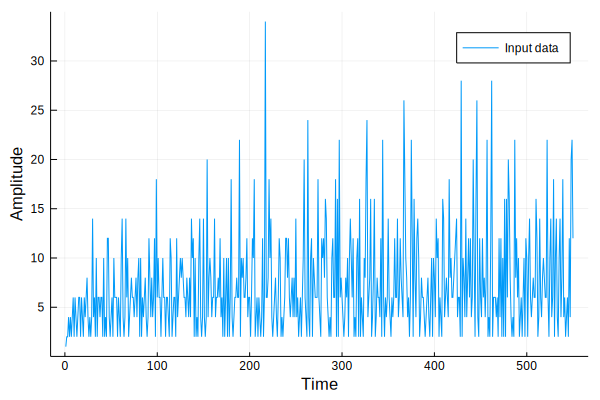

In [3]:
## Plot input data
plt1 = plot(testData, label = "Input data");
xlabel!("Time")
ylabel!("Amplitude")
display(plt1);

## Overall settings

In [17]:
statisticHandle = std;
blockLength = 50;
Nblocks = 10;
NbootstrapReplicates = 200;

## Moving block bootstrap

In [28]:
## Bootstrap Statistic
bootstrapSampleHandle = MBBsample;
fullDataEstimate, replicateEstimate, resampleIndexBB, resampleDataBB = bootstrapStatistic(testData, statisticHandle, bootstrapSampleHandle, blockLength, Nblocks, NbootstrapReplicates);
stdMBB = std(replicateEstimate);

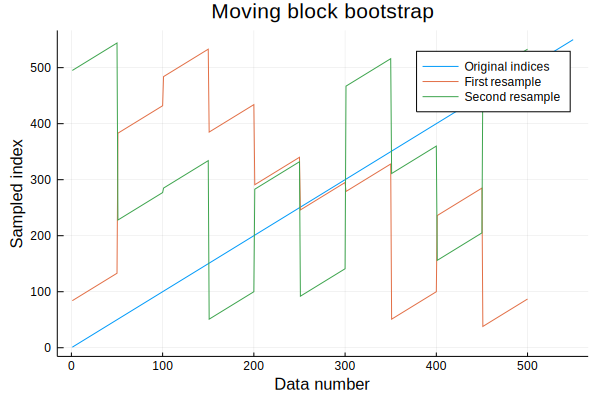

In [19]:
## Plot resampling indices
plt2 = plot(1:dataLength, label = "Original indices");
plot!(resampleIndexBB[1], label = "First resample");
plot!(resampleIndexBB[2], label = "Second resample");
title!("Moving block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt2);

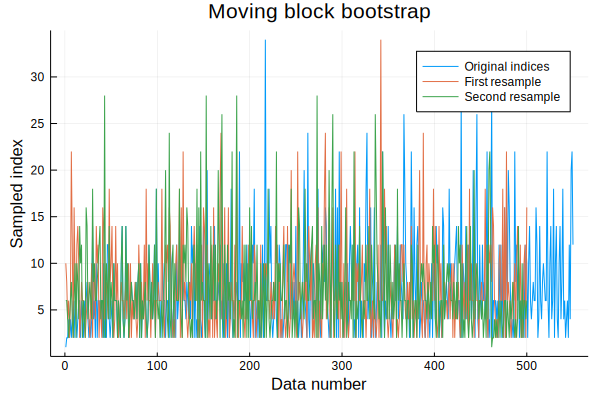

In [37]:
## Plot resampling indices
plt2 = plot(testData, label = "Original indices");
plot!(resampleDataBB[1], label = "First resample");
plot!(resampleDataBB[2], label = "Second resample");
title!("Moving block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt2);

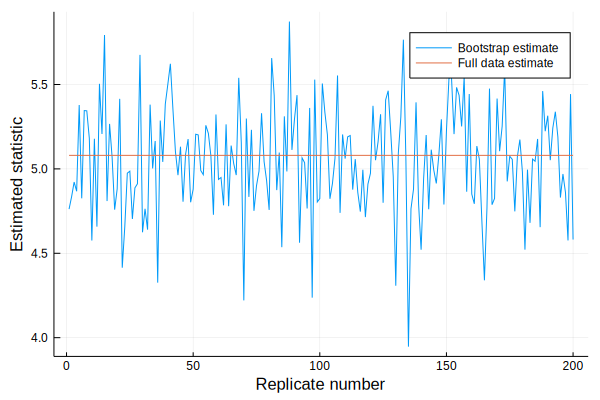

In [20]:
## Plot statistics results
plt3 = plot(replicateEstimate, label = "Bootstrap estimate");
plot!(fullDataEstimate*ones(size(replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt3);

## Non-overlapping block bootstrap

In [29]:
## Bootstrap Statistic
bootstrapSampleHandle = NBBsample;
fullDataEstimate, replicateEstimate, resampleIndexBB, resampleDataBB = bootstrapStatistic(testData, statisticHandle, bootstrapSampleHandle, blockLength, Nblocks, NbootstrapReplicates);
stdNBB = std(replicateEstimate);

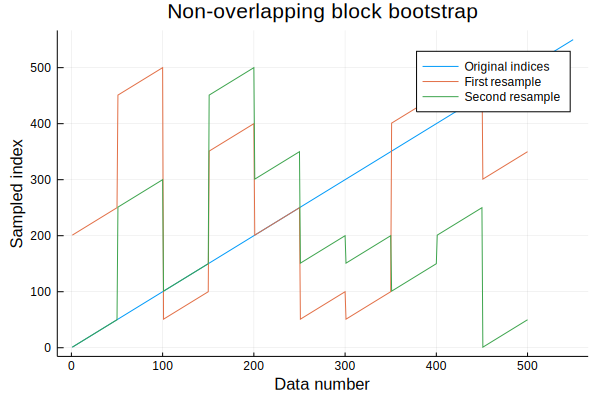

In [22]:
## Plot resampling indices
plt2 = plot(1:dataLength, label = "Original indices");
plot!(resampleIndexBB[1], label = "First resample");
plot!(resampleIndexBB[2], label = "Second resample");
title!("Non-overlapping block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt2);

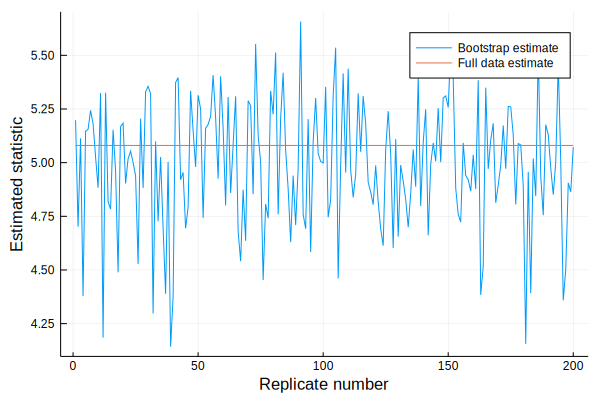

In [23]:
## Plot statistics results
plt3 = plot(replicateEstimate, label = "Bootstrap estimate");
plot!(fullDataEstimate*ones(size(replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt3);

## Circular block bootstrap

In [30]:
## Bootstrap Statistic
bootstrapSampleHandle = CBBsample;
fullDataEstimate, replicateEstimate, resampleIndexBB, resampleDataBB = bootstrapStatistic(testData, statisticHandle, bootstrapSampleHandle, blockLength, Nblocks, NbootstrapReplicates);
stdCBB = std(replicateEstimate);

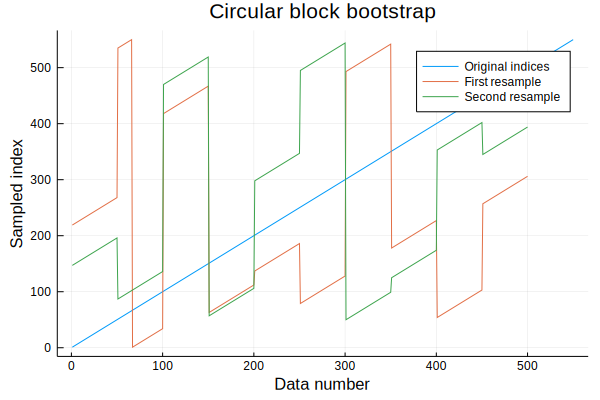

In [25]:
## Plot resampling indices
plt2 = plot(1:dataLength, label = "Original indices");
plot!(resampleIndexBB[1], label = "First resample");
plot!(resampleIndexBB[2], label = "Second resample");
title!("Circular block bootstrap")
xlabel!("Data number")
ylabel!("Sampled index")
display(plt2);

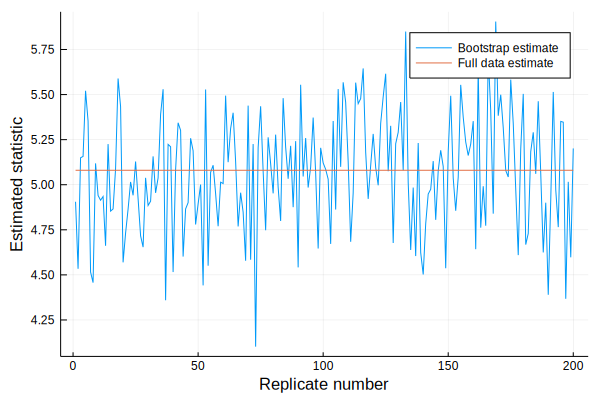

In [26]:
## Plot statistics results
plt3 = plot(replicateEstimate, label = "Bootstrap estimate");
plot!(fullDataEstimate*ones(size(replicateEstimate)), label = "Full data estimate");
xlabel!("Replicate number")
ylabel!("Estimated statistic")
display(plt3);

## Comparing results

In [35]:
#plt4 = scatter( stdMBB, label = "MBB");
#scatter!( stdNBB, label = "NBB");
#scatter!( stdCBB, label = "CBB");
#xlabel!("Replicate number")
#ylabel!("Estimated statistic")
#display(plt4);
println(stdMBB)
println(stdNBB)
println(stdCBB)

0.30998345672947036
0.28206001641299605
0.29880380834562215
